# Преобразование Фурье
### Kirill Zakharov
2021

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from dateutil.relativedelta import relativedelta

from math import *
from scipy.optimize import minimize
plt.style.use('ggplot')

Загрузим и отобразим данные об объемах пассажирских авиаперевозок.

In [2]:
passengers = pd.read_csv('passengers.csv', index_col='date', parse_dates=True)

In [6]:
passengers.head()

,num_passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


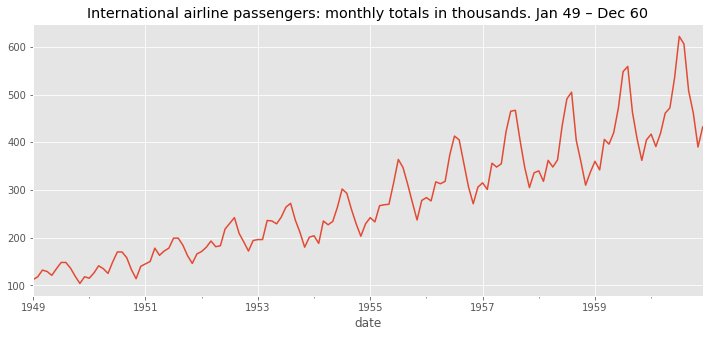

In [9]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

In [10]:
passengers['time'] = range(len(passengers))
passengers['sin'] = np.sin(2*pi*(passengers['time'].values-1)/12)
passengers['cos'] = np.cos(2*pi*(passengers['time'].values-1)/12)
passengers['const'] = 1

In [11]:
passengers.head()

,num_passengers,time,sin,cos,const
date,,,,,
1949-01-01,112,0,-0.500000,8.660254e-01,1
1949-02-01,118,1,0.000000,1.000000e+00,1
1949-03-01,132,2,0.500000,8.660254e-01,1
1949-04-01,129,3,0.866025,5.000000e-01,1
1949-05-01,121,4,1.000000,6.123234e-17,1


In [14]:
res = minimize(lambda x: ((passengers['num_passengers']-x[0]*passengers['time']-x[1]*passengers['sin']\
                           -x[2]*passengers['cos']-x[3]*passengers['const'])**2).mean(), (0.1,0.1,0.1,0.1))
coeff = res.x

In [16]:
passengers['approx'] = coeff[0]*passengers['time']+coeff[1]*passengers['sin']+\
                coeff[2]*passengers['cos']+coeff[3]*passengers['const']

In [17]:
passengers

,num_passengers,time,sin,cos,const,approx
date,,,,,,
1949-01-01,112,0,-5.000000e-01,8.660254e-01,1,45.332834
1949-02-01,118,1,0.000000e+00,1.000000e+00,1,56.791618
1949-03-01,132,2,5.000000e-01,8.660254e-01,1,78.081622
1949-04-01,129,3,8.660254e-01,5.000000e-01,1,104.208238
1949-05-01,121,4,1.000000e+00,6.123234e-17,1,128.880893
...,...,...,...,...,...,...
1960-08-01,606,139,6.369401e-15,-1.000000e+00,1,495.855975
1960-09-01,508,140,-5.000000e-01,-8.660254e-01,1,479.865727
1960-10-01,461,141,-8.660254e-01,-5.000000e-01,1,459.038867


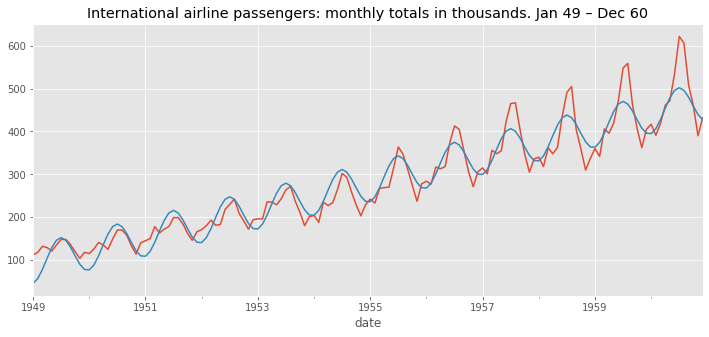

In [18]:
passengers['num_passengers'].plot(figsize=(12,5))
passengers['approx'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

### Прогноз на 3 года

In [19]:
predict = pd.DataFrame(passengers)

In [22]:
start = passengers.index[-1]
start = start + relativedelta(months=1)
new_index = pd.date_range(start=start, periods=36, freq='MS')

In [23]:
for i in range(len(new_index)):
    predict.loc[new_index[i]] = [0,0,0,0,0, coeff[0]*(len(passengers)+i)+coeff[1]*np.sin(2*pi*(len(passengers)+i-1)/12)+coeff[2]*np.cos(2*pi*(len(passengers)+i-1)/12)+coeff[3]]

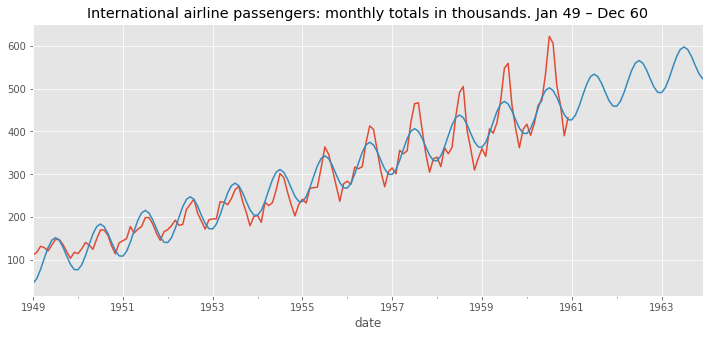

In [24]:
passengers['num_passengers'].plot(figsize=(12,5))
predict['approx'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

### Остатки

In [25]:
passengers['err'] = passengers['num_passengers']-passengers['approx']

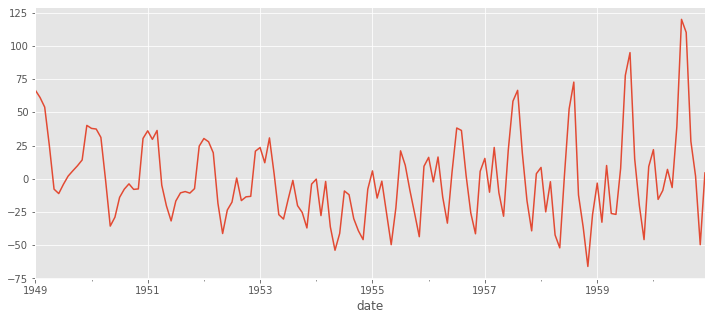

In [26]:
passengers['err'].plot(figsize=(12,5))
plt.show()